In [2]:
!pip install skillsnetwork


  Obtaining dependency information for skillsnetwork from https://files.pythonhosted.org/packages/a2/30/5283734a7da119dab6d177bdd276506a367a4b89819459d31b3f2c7eb42a/skillsnetwork-0.21.9-py3-none-any.whl.metadata


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skillsnetwork
import warnings
warnings.filterwarnings('ignore')

In [2]:
#you will need to download the dataset; if you are running locally, please comment out the following 
await skillsnetwork.download_dataset('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv')


Saved as 'automobileEDA.csv'


In [3]:
df = pd.read_csv("automobileEDA.csv", header=0)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [30]:
df['engine-size']

0      130
1      130
2      152
3      109
4      136
      ... 
196    141
197    141
198    173
199    145
200    141
Name: engine-size, Length: 201, dtype: int64

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
# create linear regression object
lm = LinearRegression()
lm

LinearRegression()

we want to look at how highway-mpg can help us predict car price. Using simple linear regression

In [8]:
X = df[['highway-mpg']]
Y = df['price']

In [9]:
#Fit the linear model using highway-mpg:
lm.fit(X,Y)

LinearRegression()

In [10]:
# output of prediction
Yhat=lm.predict(X)
Yhat[0:5]   

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [11]:
#the intercept (a)
lm.intercept_

38423.305858157386

In [14]:
#the slope (b)
lm.coef_

array([-821.73337832])

Yhat = a + b  X
Plugging in the actual values we get:
Price = 38423.31 - 821.73 x highway-mpg

In [15]:
#create the model
lm1 = LinearRegression()
lm1

LinearRegression()

In [17]:
# fit the model
lm1.fit(df[['engine-size']], df[['price']])
lm1

LinearRegression()

In [18]:
# Slope 
lm1.coef_

array([[166.86001569]])

In [19]:
# Intercept
lm1.intercept_

array([-7963.33890628])

In [33]:
# using X and Y  
Yhat=-7963.34 + 166.86*X
Price=-7963.34 + 166.86*df['engine-size']


### Multiple Linear Regression

In [21]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm.fit(Z, df['price'])

LinearRegression()

In [22]:
lm.intercept_

-15806.624626329198

In [23]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

the linear function is:
Price = -15806.62462632918 + 53.49574423 x horsepower + 4.70770099 x curb-weight + 81.53026382 x engine-size + 36.05748882 x highway-mpg

In [24]:
lm2 = LinearRegression()
W = df[["normalized-losses","highway-mpg"]]
lm2.fit(W,df['price'])

LinearRegression()

In [25]:
lm2.coef_

array([   1.49789586, -820.45434016])

In [26]:
lm2.intercept_

38201.313272457264

### Model Evaluation Using Visualization 

In [27]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

#### Regression Plot

(0.0, 48173.41915777574)

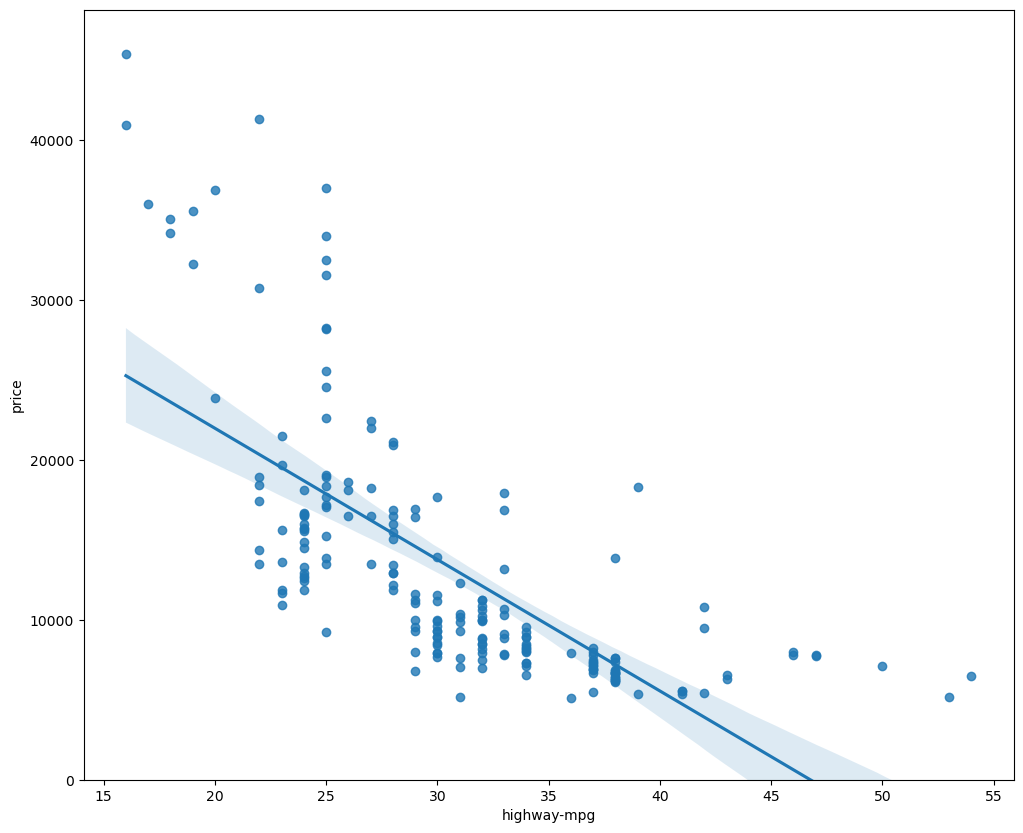

In [34]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

One thing to keep in mind when looking at a regression plot is to pay attention to how scattered the data points are around the regression line. This will give you a good indication of the variance of the data and whether a linear model would be the best fit or not. If the data is too far off from the line, this linear model might not be the best model for this data.

Let's compare this plot to the regression plot of "peak-rpm".

(0.0, 47414.1)

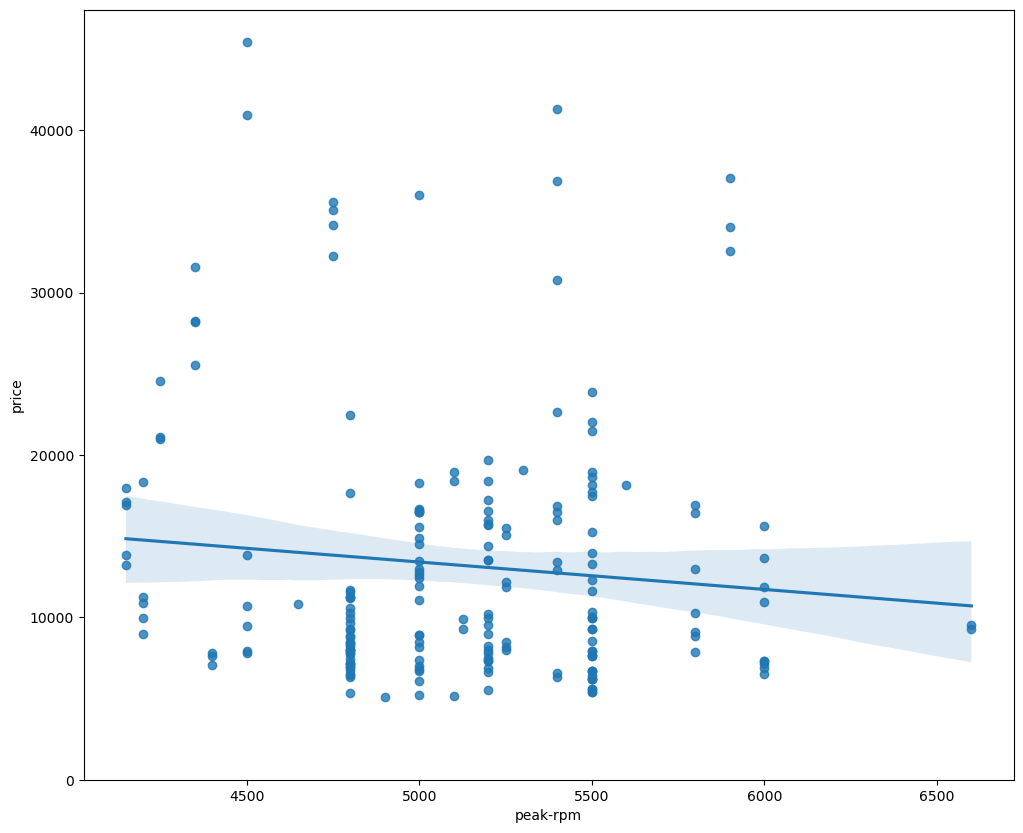

In [35]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

Comparing the regression plot of "peak-rpm" and "highway-mpg", we see that the points for "highway-mpg" are much closer to the generated line and, on average, decrease. The points for "peak-rpm" have more spread around the predicted line and it is much harder to determine if the points are decreasing or increasing as the "peak-rpm" increases

### Residual Plot 

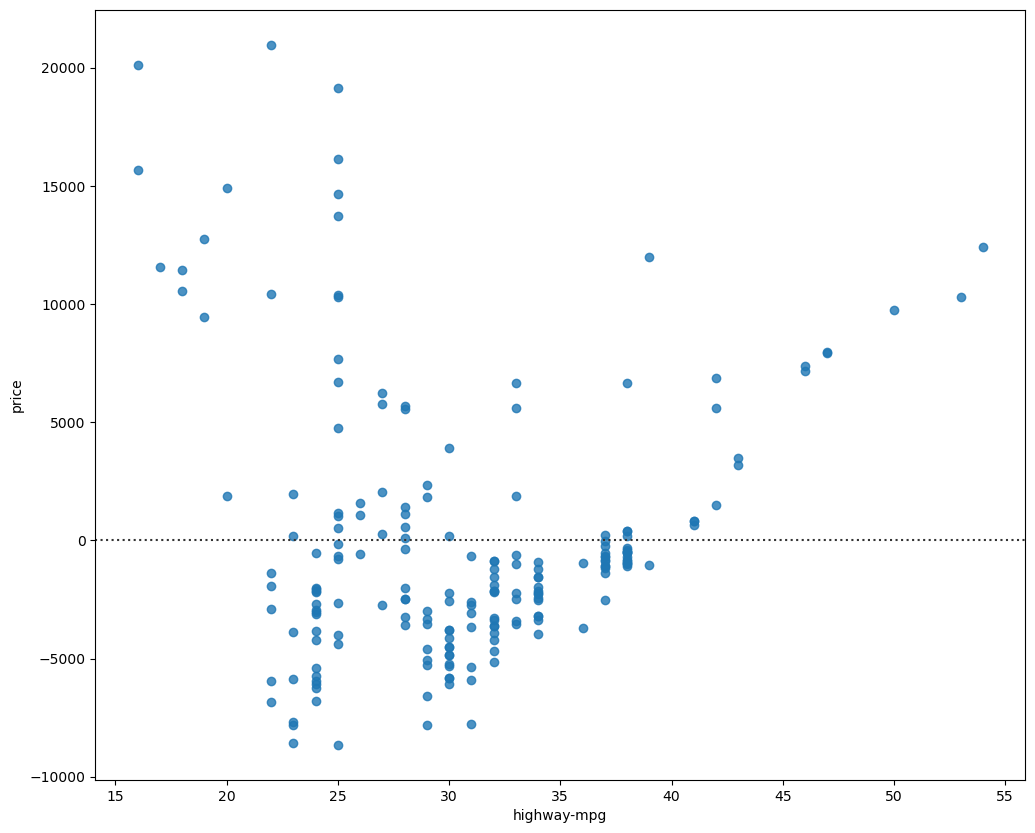

In [36]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'],y=df['price'])
plt.show()

Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.
We can see from this residual plot that the residuals are not randomly spread around the x-axis, leading us to believe that maybe a non-linear model is more appropriate for this data.

### Multiple Linear Regression 

We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.

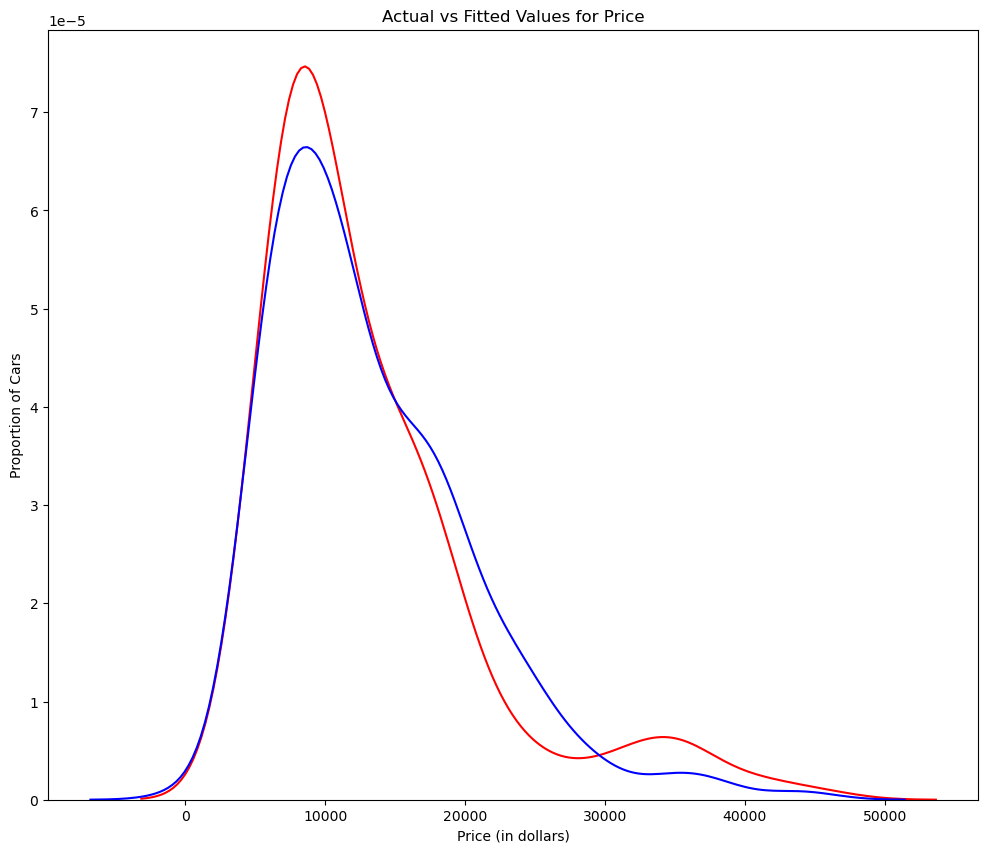

In [38]:
# make prediction
Y_hat = lm.predict(Z)

# plot
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

We can see that the fitted values are reasonably close to the actual values since the two distributions overlap a bit.

### Polynomial Regression and Pipelines 

We saw earlier that a linear model did not provide the best fit while using "highway-mpg" as the predictor variable.

In [39]:
# function
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [40]:
# get the variables
x = df['highway-mpg']
y = df['price']

In [41]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


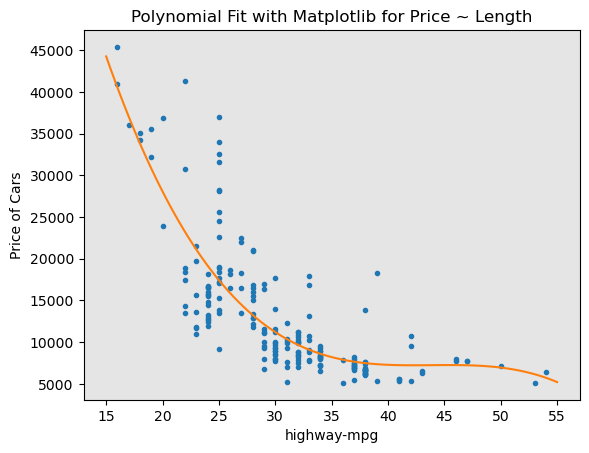

In [42]:
PlotPolly(p, x, y, 'highway-mpg')

In [43]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function "hits" more of the data points.

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


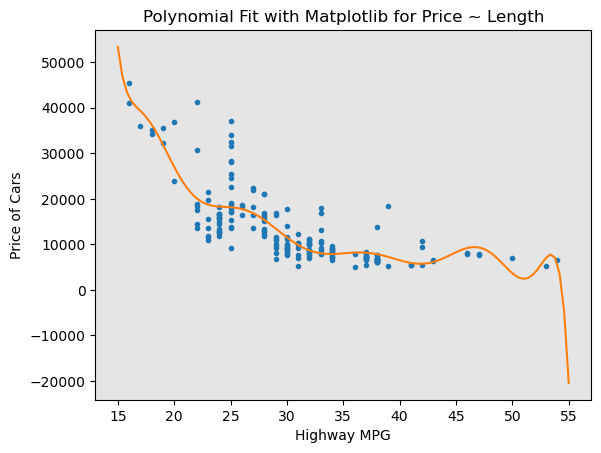

In [44]:
# Here we use a polynomial of the 11th order 
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

In [45]:
from sklearn.preprocessing import PolynomialFeatures

In [46]:
# create a PolynomialFeatures object of degree 2:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [47]:
Z_pr=pr.fit_transform(Z)

In [53]:
Z.shape

(201, 4)

In the original data, there are 201 samples and 4 features.

In [52]:
Z_pr.shape

(201, 15)

After the transformation, there are 201 samples and 15 features.

In [54]:
# import pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [55]:
#We create the pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructor.
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [56]:
# We input the list as an argument to the pipeline constructor:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [57]:
#  we convert the data type Z to type float to avoid conversion warnings that may appear as a result of StandardScaler taking float inputs.
#  we can normalize the data, perform a transform and fit the model simultaneously.
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [63]:
# we can normalize the data, perform a transform and produce a prediction simultaneously.
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [64]:
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

### Measures for In-Sample Evaluation 

### Model 1: Simple Linear Regression 

In [65]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339175


In [66]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [67]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639895


### Model 2: Multiple Linear Regression 

In [68]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


We can say that ~80.896 % of the variation of price is explained by this multiple linear regression "multi_fit".

In [69]:
#We produce a prediction:
Y_predict_multifit = lm.predict(Z)
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


### Model 3: Polynomial Fit 

In [70]:
from sklearn.metrics import r2_score

In [71]:
# We apply the function to get the value of R^2:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


We can say that ~67.419 % of the variation of price is explained by this polynomial fit.

In [72]:
# We can also calculate the MSE:
mean_squared_error(df['price'], p(x))

20474146.426361218

### Prediction and Decision Making

In [73]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

In [74]:
# Create a new input:
new_input=np.arange(1, 100, 1).reshape(-1, 1)
# Fit the model
lm.fit(X, Y)
lm

LinearRegression()

In [75]:
# Produce a prediction:
yhat=lm.predict(new_input)
yhat[0:5]

array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

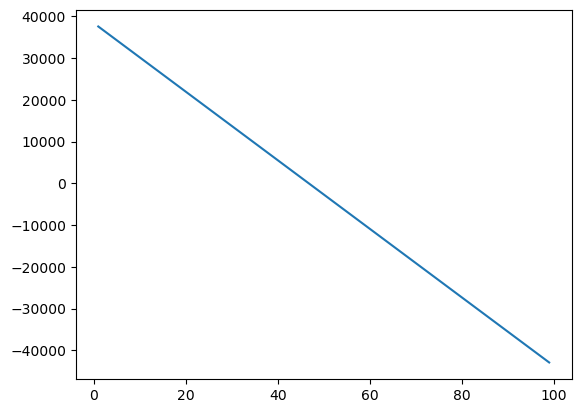

In [76]:
# We can plot the data:
plt.plot(new_input, yhat)
plt.show()

NOTE:
When comparing models, the model with the higher R-squared value is a better fit for the data.
When comparing models, the model with the higher R-squared value is a better fit for the data.